In [675]:
import scipy as sci
import pysindy as ps
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, CubicSpline
from matplotlib.gridspec import GridSpec as GS
from numpy import linalg as LA 
from scipy.integrate import odeint, solve_ivp

# 0D-Case

In [676]:
# np.cross(m,H)

In [677]:
# def func(t,state,h,gamma,alpha):
#     gamma=-1.760
#     alpha=0.02
#     h=(0,0,1)
#     mx, my, mz = state
#     dmx = -gamma*(h[2]*my - h[1]*mz + alpha*gamma*(h[1]* mx*my - h[0]*(my**2) + h[2]*mx*mz - h[0]*(mz**2)))
#     dmy = -gamma*(-h[2]*mx + h[0]*mz + alpha*gamma*(-h[1]*mx**2 + h[0]*mx*my + h[2]*my*mz - h[1]*(mz**2)))
#     dmz = -gamma*(h[1]* mx - h[0]*my + alpha*gamma*(-h[2]*mx**2 - h[2]*(my**2) + h[0]*mx*mz + h[1]*my*mz))
     
#     return [dmx, dmy, dmz]

In [678]:
def func(t, m,h,gamma,alpha):
     dm=-gamma*(np.cross(m,h)-alpha*np.cross(m,-gamma*np.cross(m,h)))
     
     return dm

In [679]:
m=[1,0,0] #inital magentisation
gamma=-1.760  #*10^11 for actual value
alpha=0.02
h=(0,0,1)
p=(h,gamma,alpha)

In [682]:
# t_span = (0.0, 10*(10**-9))
t = np.arange(0.0, 100,0.01)
result_odeint = odeint(func, m, t,p, tfirst=True)
# result_solve_ivp = solve_ivp(func, t_span, m, args=p)

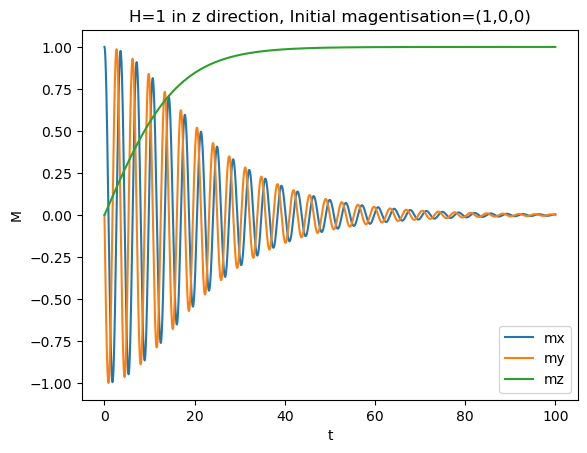

In [683]:
fig = plt.figure()
plt.plot(t,result_odeint[:,0], label='mx')
plt.plot(t,result_odeint[:,1], label='my')
plt.plot(t,result_odeint[:,2], label='mz')
plt.xlabel("t")
plt.ylabel("M")
plt.title("H=1 in z direction, Initial magentisation=(1,0,0)")
plt.legend()
plt.show()

Text(0.5, 0.92, 'Magnetisation for 0D single spin')

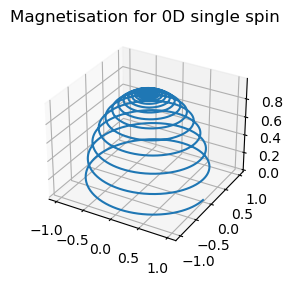

In [684]:
fig=plt.figure()
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot(result_odeint[:, 0],
        result_odeint[:, 1],
        result_odeint[:, 2])
ax.set_title("Magnetisation for 0D single spin")
 
# ax = fig.add_subplot(1, 2, 3, projection='3d')
# ax.plot(result_solve_ivp.y[0, :],
#         result_solve_ivp.y[1, :],
#         result_solve_ivp.y[2, :])
# ax.set_title("solve_ivp")


In [685]:
M=result_odeint

In [686]:
# library_functions = [lambda x: x, lambda x: x * x, lambda x, y: x * y, lambda x, y, z: x * y * z, lambda x, y: x * x * y]
# library_function_names = [lambda x: x, lambda x: x + x, lambda x, y: x + y,lambda x, y, z: x + y + z, lambda x, y: x + x + y]
# ode_lib = ps.WeakPDELibrary(
#     library_functions=library_functions,
#     function_names=library_function_names,
#     spatiotemporal_grid=t,
#     is_uniform=True,
#     K=100,
# )

# Instantiate and fit the SINDy model with the integral of u_dot
# optimizer = ps.SR3(
#     threshold=0.02, thresholder="l1", normalize_columns=True, tol=1e-1
# )
library_functions = [lambda x: x, lambda x: x * x, lambda x, y: x * y, lambda x, y, z: x * y * z, lambda x, y: x * x * y]
library_function_names = [lambda x: x, lambda x: x + x, lambda x, y: x + y,lambda x, y, z: x + y + z, lambda x, y: x + x + y]
pde_lib = ps.PDELibrary(
    library_functions=library_functions,
    function_names=library_function_names,
    )
model = ps.SINDy(feature_library=pde_lib,feature_names=["mx","my","mz"],optimizer=ps.SR3(threshold=0.04))
model.fit(M, t)

SINDy(differentiation_method=FiniteDifference(),
      feature_library=<pysindy.feature_library.pde_library.PDELibrary object at 0x000001B582ABA890>,
      feature_names=['mx', 'my', 'mz'], optimizer=SR3(threshold=0.04))

In [687]:
model.print()
#Expectation:

# mx'= 1.76 (my - 0.0352 mx mz),
# my'= 1.76 (-mx - 0.0352 my mz), 
# mz'=-0.0352 (-1.76 mx^2 - 1.76 my^2)

(mx)' = 1.760 my + -0.062 mxmz
(my)' = -1.760 mx + -0.062 mymz
(mz)' = 0.062 mxmx + 0.062 mymy


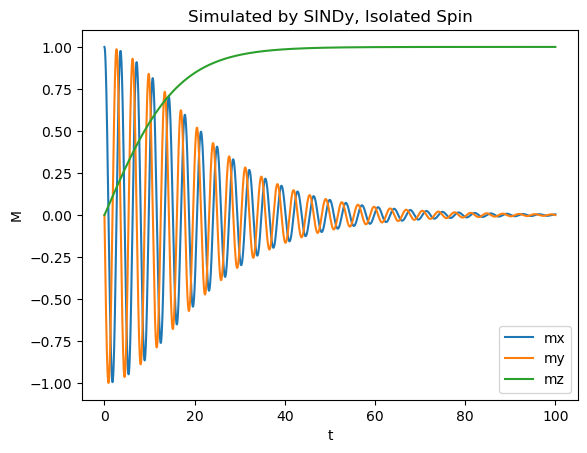

In [688]:
sim=model.simulate(m,t,integrator='odeint')
fig = plt.figure()
plt.plot(t,sim[:,0], label='mx')
plt.plot(t,sim[:,1], label='my')
plt.plot(t,sim[:,2], label='mz')
plt.xlabel("t")
plt.ylabel("M")
plt.title("Simulated by SINDy, Isolated Spin")
plt.legend()
plt.show()


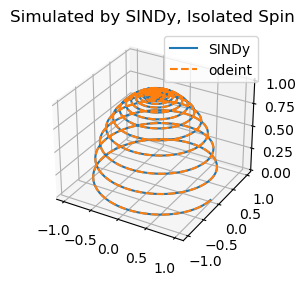

In [689]:
fig=plt.figure()
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot(sim[:, 0],
        sim[:, 1],
        sim[:, 2],label='SINDy')

ax.plot(result_odeint[:, 0],
        result_odeint[:, 1],
        result_odeint[:, 2],label='odeint', linestyle='dashed')
ax.set_title("Simulated by SINDy, Isolated Spin")
ax.legend()
plt.show()

# Spherical Geometry

In [690]:

def funcsph(t, m,h,gamma,alpha):
    demag=np.array([1/3,1/3,1/3])
    h=np.subtract(h,np.dot(demag,m))
    dm=-gamma*(np.cross(m,h)-alpha*np.cross(m,-gamma*np.cross(m,h)))
     
    return dm

# np.dot([1/3],)
# np.subtract(h,m)
m=[1,0,0] #inital magentisation
gamma=-1.760  #*10^11 for actual value
alpha=0.02
h=(0,0,1)
p=(h,gamma,alpha)

In [691]:
t = np.arange(0.0, 100,0.01)
result_odeintsph = odeint(funcsph, m, t,p, tfirst=True)

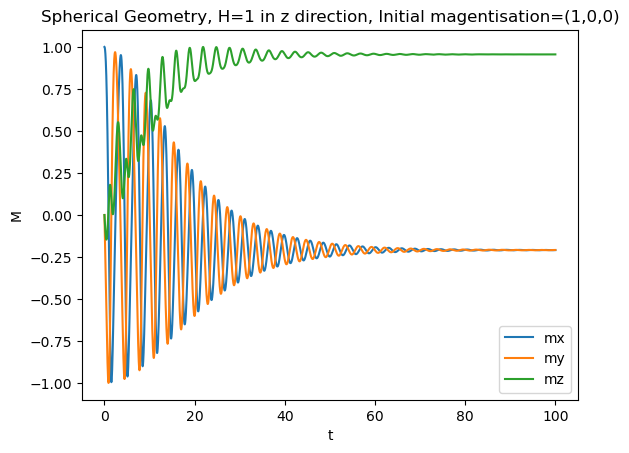

In [699]:
fig = plt.figure()
plt.plot(t,result_odeintsph[:,0], label='mx')
plt.plot(t,result_odeintsph[:,1], label='my')
plt.plot(t,result_odeintsph[:,2], label='mz')
plt.xlabel("t")
plt.ylabel("M")
plt.title("Spherical Geometry, H=1 in z direction, Initial magentisation=(1,0,0)")
plt.legend()
plt.show()

Text(0.5, 0.92, 'Magnetisation for Spherical Geometry')

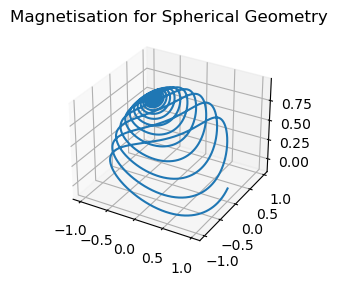

In [693]:
fig=plt.figure()
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot(result_odeintsph[:, 0],
        result_odeintsph[:, 1],
        result_odeintsph[:, 2])
ax.set_title("Magnetisation for Spherical Geometry")

In [694]:
Msph=result_odeintsph
modelsph = ps.SINDy(feature_names=["mx","my","mz"],optimizer=ps.STLSQ(threshold=0.2))
modelsph.fit(Msph, t)
modelsph.print()

(mx)' = 1.746 my + -0.575 mx my + 0.520 mx mz + -0.589 my^2 + 0.568 mz^2
(my)' = -1.773 mx + 0.585 mx^2 + 0.597 mx my + -0.653 my mz + -0.605 mz^2
(mz)' = -0.524 mx^2 + -0.577 mx mz + 0.651 my^2 + 0.596 my mz


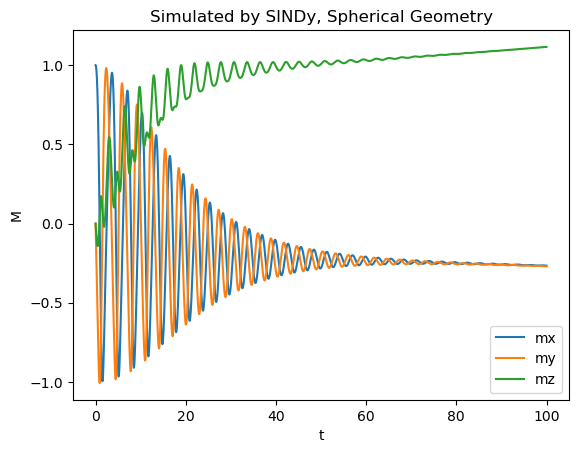

In [695]:
simsph=modelsph.simulate(m,t,integrator='odeint')
fig = plt.figure()
plt.plot(t,simsph[:,0], label='mx')
plt.plot(t,simsph[:,1], label='my')
plt.plot(t,simsph[:,2], label='mz')
plt.xlabel("t")
plt.ylabel("M")
plt.title("Simulated by SINDy, Spherical Geometry")
plt.legend()
plt.show()

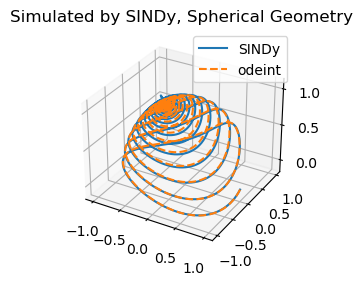

In [701]:
fig=plt.figure()
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot(simsph[:, 0],
        simsph[:, 1],
        simsph[:, 2],label='SINDy')

ax.plot(result_odeintsph[:, 0],
        result_odeintsph[:, 1],
        result_odeintsph[:, 2],label='odeint', linestyle='dashed')
ax.set_title("Simulated by SINDy, Spherical Geometry")
ax.legend()
plt.show()

In [697]:
np.sqrt(np.mean((result_odeintsph-simsph)**2))

0.05619256588027984

# Errors between SINDy simulations and ODE solutions

In [435]:
def errsph(alpha):
    m=[1,0,0] #inital magentisation
    gamma=-1.760  #*10^11 for actual value
    h=(0,0,1)
    p=(h,gamma,alpha)
    
#     if(alpha>0.1):
    t=np.linspace(0.0, min(100*0.02/alpha,100), num=1000)
#     else:
#         t = np.arange(0.0, 100,0.01)
#     if(alpha<0.1):
#         thres=0.2
#     else:
#         thres=0.3
    result_odeintsph = odeint(funcsph, m, t,p, tfirst=True)
    Msph=result_odeintsph
    library_functions = [lambda x: x, lambda x: x * x, lambda x, y: x * y, lambda x, y, z: x * y * z, lambda x, y: x * x * y]
    library_function_names = [lambda x: x, lambda x: x + x, lambda x, y: x + y,lambda x, y, z: x + y + z, lambda x, y: x + x + y]
    pde_lib = ps.PDELibrary(
    library_functions=library_functions,
    function_names=library_function_names
    )
    modelsph = ps.SINDy(feature_library=pde_lib,feature_names=["mx","my","mz"],optimizer=ps.STLSQ(threshold=0.2))
    modelsph.fit(Msph, t)
    simsph=modelsph.simulate(m,t, integrator='odeint')
    rms=np.sqrt(np.mean((result_odeintsph-simsph)**2))
    return rms
def err(alpha):
    m=[1,0,0] #inital magentisation
    gamma=-1.760  #*10^11 for actual value
    h=(0,0,1)
    p=(h,gamma,alpha)
    t = np.arange(0.0, 100,0.01)
#     t=np.linspace(0.0, min(100*0.02/alpha,100), num=1000)
    result_odeint = odeint(func, m, t,p, tfirst=True)
    M=result_odeint
    library_functions = [lambda x: x, lambda x: x * x, lambda x, y: x * y, lambda x, y, z: x * y * z, lambda x, y: x * x * y]
    library_function_names = [lambda x: x, lambda x: x + x, lambda x, y: x + y,lambda x, y, z: x + y + z, lambda x, y: x + x + y]
    pde_lib = ps.PDELibrary(
    library_functions=library_functions,
    function_names=library_function_names
    )
    model = ps.SINDy(feature_library=pde_lib,feature_names=["mx","my","mz"],optimizer=ps.SR3(threshold=min(alpha,0.1)))
    model.fit(M, t)
    sim=model.simulate(m,t, integrator='odeint')
    rms=np.sqrt(np.mean((result_odeint-sim)**2))
    return rms
   # min(alpha,0.1)

In [308]:
def err(alpha):
    m=[1,0,0] #inital magentisation
    gamma=-1.760  #*10^11 for actual value
    h=(0,0,1)
    p=(h,gamma,alpha)
    t = np.arange(0.0, 100,0.01)
    result_odeint = odeint(func, m, t,p, tfirst=True)
    M=result_odeint
    model = ps.SINDy(feature_names=["mx","my","mz"],optimizer=ps.SR3,
    feature_library=ps.PolynomialLibrary(degree=2))
    model.fit(M, t)
    sim=model.simulate(m,t, integrator='odeint')
#     rms=LA.norm((result_odeint-sim)/len(t))
    rms=np.sqrt(np.mean((result_odeint-sim)**2))
    return rms
    

In [707]:
from joblib import Parallel, delayed
alplist=np.arange(0.01,0.20,0.005)
alpsph = Parallel(n_jobs=6)(delayed(errsph)(a) for a in alplist)
alp=Parallel(n_jobs=6)(delayed(err)(a) for a in alplist)
    

In [749]:
for i in range(1,11):
    print(err(0.02*i))

0.0003109846192985861
0.00011730956718751947
7.390167612074095e-05
5.882630986488244e-05
5.2541851575475416e-05
4.961307593892028e-05
4.81721685105512e-05
4.7457656784613013e-05
4.713024731445013e-05
4.7034249355119503e-05


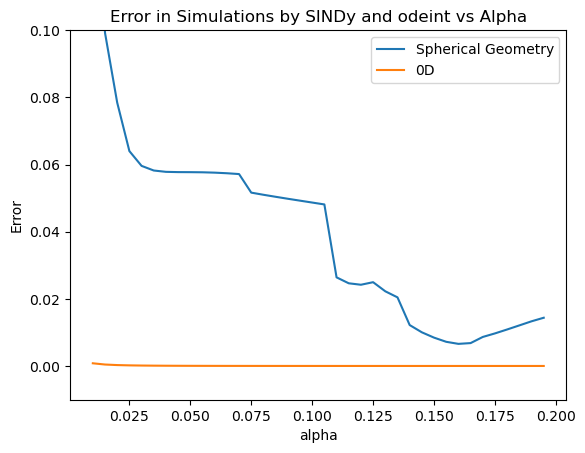

In [708]:
plt.plot(alplist,alpsph, label='Spherical Geometry')
plt.plot(alplist,alp, label='0D')
plt.ylim([-.01,0.1])
plt.xlabel("alpha")
plt.ylabel("Error")
plt.title("Error in Simulations by SINDy and odeint vs Alpha")
plt.legend()
plt.show()

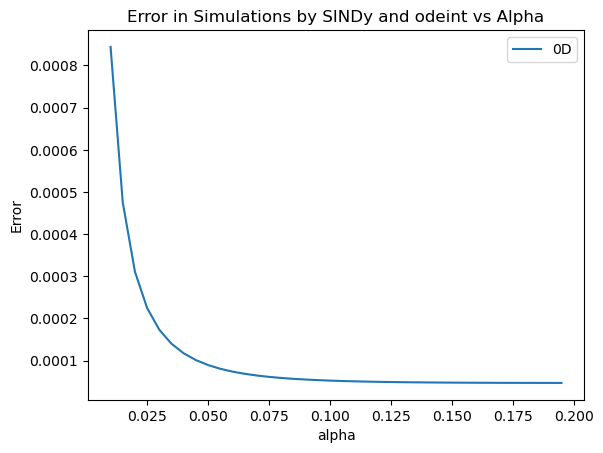

In [746]:

plt.plot(alplist,alp, label='0D')

plt.xlabel("alpha")
plt.ylabel("Error")
plt.title("Error in Simulations by SINDy and odeint vs Alpha")
plt.legend()
plt.show()

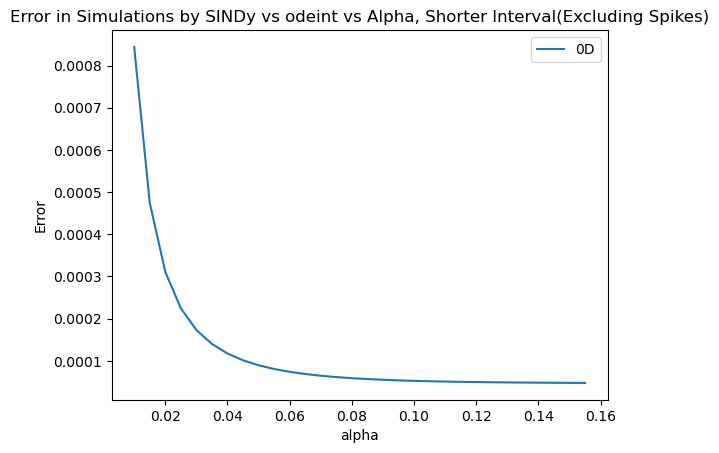

In [745]:


plt.plot(alplist[0:30],alp[0:30], label='0D')
plt.xlabel("alpha")
plt.ylabel("Error")
plt.title("Error in Simulations by SINDy vs odeint vs Alpha, Shorter Interval(Excluding Spikes)")
plt.legend()
plt.show()

# Flat Rectangular Prism 

In [440]:
#defining tensor
def f(x,y,z,a,b,c):
    fx=(b-y)*(c-z)/((a-x)*(((a-x)**2+(b-y)**2+(c-z)**2)**0.5))
    fy=(a-x)*(c-z)/((b-y)*(((a-x)**2+(b-y)**2+(c-z)**2)**0.5))
    fz=(a-x)*(b-y)/((c-z)*(((a-x)**2+(b-y)**2+(c-z)**2)**0.5))
    
    
    return np.array([fx,fy,fz])
def fij(x,y,z,a,b,c):
    fxy=(c-z)+(((a-x)**2+(b-y)**2+(c-z)**2)**0.5)
    fyz=(a-x)+(((a-x)**2+(b-y)**2+(c-z)**2)**0.5)
    fxz=(b-y)+(((a-x)**2+(b-y)**2+(c-z)**2)**0.5)
    return np.array([[0,fxy,fxz],[fxy,0,fyz],[fxz,fyz,0]])


def tens(x,y,z,a,b,c):
    ni=np.array([[0.,0.,0.],[0.,0.,0.],[0.,0.,0.]])
    
    for i in range(3):
        
        ni[i,i]=(1/(4*np.pi))*(np.arctan(f(x,y,z,a,b,c)[i])+
                                         np.arctan(f(-x,y,z,a,b,c)[i])+
                                                   np.arctan(f(x,-y,z,a,b,c)[i])+
                                                             np.arctan(f(x,y,-z,a,b,c)[i])+
                                                                       np.arctan(f(x,-y,-z,a,b,c)[i])+
                                                                                 np.arctan(f(-x,-y,z,a,b,c)[i])+
                                                                                           np.arctan(f(-x,y,-z,a,b,c)[i])+
                                                                                                     np.arctan(f(-x,-y,-z,a,b,c)[i]))
            
    for i in range(3):
        for j in range(3):
            
            if j!=i:
                ni[i,j]=(-1/(4*np.pi))*np.log(fij(x,y,z,a,b,c)[i,j]*
                                              fij(x,y,z,-a,-b,c)[i,j]*
                                              fij(x,y,z,a,-b,-c)[i,j]*
                                              fij(x,y,z,-a,b,-c)[i,j]
                                              /(fij(x,y,z,a,-b,c)[i,j]*
                                                fij(x,y,z,-a,b,c)[i,j]*
                                                fij(x,y,z,a,b,-c)[i,j]*
                                                fij(x,y,z,-a,-b,-c)[i,j]))              
                
                
            
    return ni
        
    


In [441]:
np.dot(tens(0,0,0,1,1,0.1),[1,2,3])


array([0.04482945, 0.0896589 , 2.73102329])

In [724]:
def funccub(t, m,h,gamma,alpha,dim):               #defining ODE
    [x,y,z,a,b,c]=dim
    demag=tens(x,y,z,a,b,c)
    h=np.subtract(h,np.dot(demag,m))
    dm=-gamma*(np.cross(m,h)-alpha*np.cross(m,-gamma*np.cross(m,h)))
     
    return dm


In [725]:
dim=[0,0,0,1,1,0.1]
m=[1,0,0] #inital magentisation
gamma=-1.760  #*10^11 for actual value
alpha=0.1
h=(0,0,1)
p=(h,gamma,alpha,dim)
t = np.arange(0.0, 100,0.01)


In [726]:
result_odeintcub = odeint(funccub, m, t,p, tfirst=True)

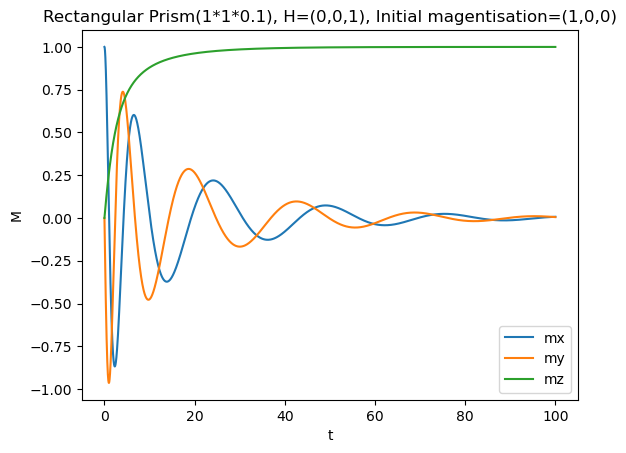

In [727]:
fig = plt.figure()
plt.plot(t,result_odeintcub[:,0], label='mx')
plt.plot(t,result_odeintcub[:,1], label='my')
plt.plot(t,result_odeintcub[:,2], label='mz')
plt.xlabel("t")
plt.ylabel("M")
plt.title("Rectangular Prism(1*1*0.1), H=(0,0,1), Initial magentisation=(1,0,0)")
plt.legend()
plt.show()

Text(0.5, 0.92, 'Magnetisation for Rectagular Prism')

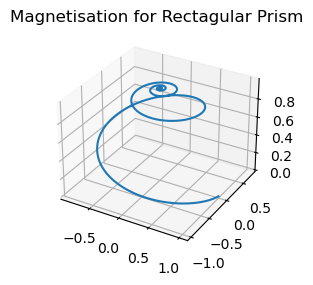

In [729]:
fig=plt.figure()
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot(result_odeintcub[:, 0],
        result_odeintcub[:, 1],
        result_odeintcub[:, 2])
ax.set_title("Magnetisation for Rectagular Prism")

In [730]:
Mcub=result_odeintcub                   #SINDy equation
library_functions = [lambda x: x, lambda x: x * x, lambda x, y: x * y, lambda x, y, z: x * y * z, lambda x, y: x * x * y]
library_function_names = [lambda x: x, lambda x: x + x, lambda x, y: x + y,lambda x, y, z: x + y + z, lambda x, y: x + x + y]
pde_lib = ps.PDELibrary(library_functions=library_functions,function_names=library_function_names,)
modelcub = ps.SINDy(feature_library=pde_lib,feature_names=["mx","my","mz"],optimizer=ps.SR3(threshold=0.01))

# modelcub = ps.SINDy(feature_names=["mx","my","mz"],optimizer=ps.STLSQ(threshold=0.01))
modelcub.fit(Mcub, t)
modelcub.print()

(mx)' = -0.154 mx + 1.794 my + -1.176 mz + 0.160 mxmx + 0.152 mymy + 1.176 mzmz + -0.042 mxmy + 0.108 mxmz + -1.560 mymz + 0.052 mxmymz + 0.437 mxmxmz + 0.457 mymymz
(my)' = -1.771 mx + -0.134 my + -0.109 mz + -0.064 mymy + 0.109 mzmz + 0.041 mxmy + 1.535 mxmz + 0.083 mymz + -0.067 mxmymz + 0.015 mxmxmy + 0.061 mxmxmz + 0.140 mymymz
(mz)' = 0.310 mxmx + 0.310 mymy + -0.268 mxmxmz + -0.268 mymymz


C:\Users\visma\anaconda3\lib\site-packages\pysindy\optimizers\sr3.py:390: ConvergenceWarning: SR3._reduce did not converge after 30 iterations.
  warnings.warn(


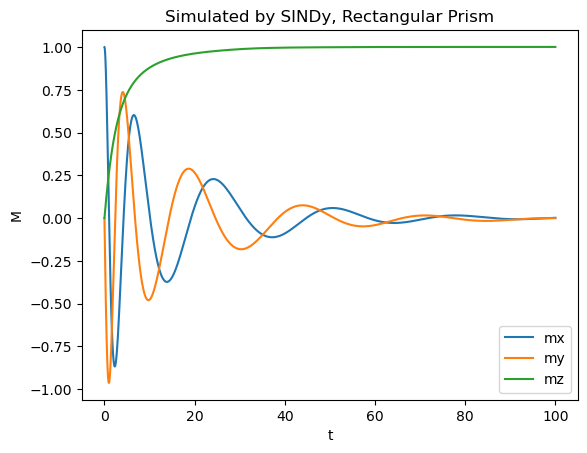

In [731]:
simcub=modelcub.simulate(m,t,integrator='odeint')
fig = plt.figure()
plt.plot(t,simcub[:,0], label='mx')
plt.plot(t,simcub[:,1], label='my')
plt.plot(t,simcub[:,2], label='mz')
plt.xlabel("t")
plt.ylabel("M")
plt.title("Simulated by SINDy, Rectangular Prism")
plt.legend()
plt.show()

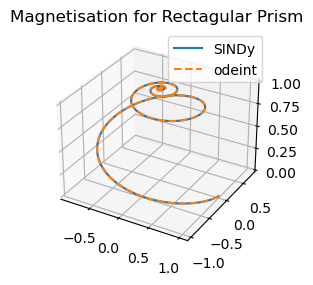

In [733]:
fig=plt.figure()
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot(simcub[:, 0],
        simcub[:, 1],
        simcub[:, 2],label="SINDy")

ax.plot(result_odeintcub[:, 0],
        result_odeintcub[:, 1],
        result_odeintcub[:, 2],label='odeint', linestyle='dashed')
ax.set_title("Magnetisation for Rectagular Prism")
ax.legend()
plt.show()


# Analysing Error as a Function of thickness

In [742]:
def errcub(c):
    dim=[0,0,0,1,1,c]
    h=(0,0,1)
    alpha=0.02
    p=(h,gamma,alpha,dim)
    result_odeintsph = odeint(funccub, m, t,p, tfirst=True)
    Msph=result_odeintsph
    library_functions = [lambda x: x, lambda x: x * x, lambda x, y: x * y, lambda x, y, z: x * y * z, lambda x, y: x * x * y]
    library_function_names = [lambda x: x, lambda x: x + x, lambda x, y: x + y,lambda x, y, z: x + y + z, lambda x, y: x + x + y]
    pde_lib = ps.PDELibrary(library_functions=library_functions,function_names=library_function_names,)
    modelsph = ps.SINDy(feature_library=pde_lib,feature_names=["mx","my","mz"],optimizer=ps.SR3(threshold=0.01))

    modelsph.fit(Msph, t)
    simsph=modelsph.simulate(m,t, integrator='odeint')
    rms=LA.norm(result_odeintsph-simsph)/len(t)
    return rms

In [752]:
for i in range(1,11):
    print(errcub(0.08*i))

0.0016924515284215172
0.0040087395117127216
0.004492938180564782
0.0031706052854996456
0.0020130985813306937
0.00120222789067992
0.0006913465949429556
0.0003848837445023523
0.00020659213290951032
0.00027760452135536126


In [743]:
thic=np.arange(0.01,0.90,0.01)
errthic = Parallel(n_jobs=6)(delayed(errcub)(a) for a in thic)

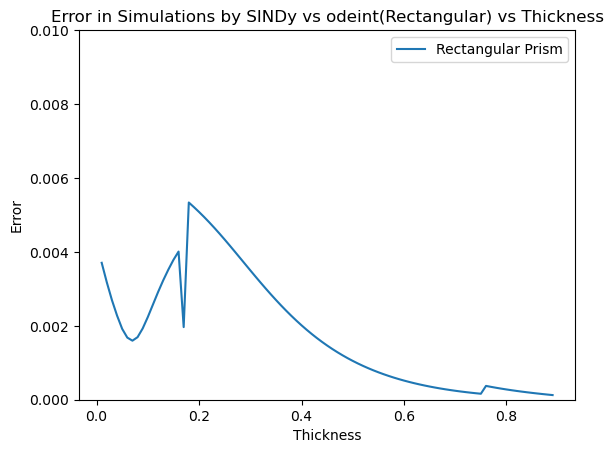

In [744]:
plt.plot(thic,errthic, label='Rectangular Prism')
plt.ylim([0,0.01])

plt.xlabel("Thickness")
plt.ylabel("Error")
plt.title("Error in Simulations by SINDy vs odeint(Rectangular) vs Thickness")

plt.legend()
plt.show()


In [667]:
def errcubalp(alpha):
    dim=[0,0,0,1,1,0.1]
    h=(0,0,1)
    p=(h,gamma,alpha,dim)
    t = np.arange(0.0, 100,0.01)
    result_odeintsph = odeint(funccub, m, t,p, tfirst=True)
    Msph=result_odeintsph
    library_functions = [lambda x: x, lambda x: x * x, lambda x, y: x * y, lambda x, y, z: x * y * z, lambda x, y: x * x * y]
    library_function_names = [lambda x: x, lambda x: x + x, lambda x, y: x + y,lambda x, y, z: x + y + z, lambda x, y: x + x + y]
    pde_lib = ps.PDELibrary(library_functions=library_functions,function_names=library_function_names,)
    modelsph = ps.SINDy(feature_library=pde_lib,feature_names=["mx","my","mz"],optimizer=ps.SR3(threshold=0.1))
    modelsph1 = ps.SINDy(feature_library=pde_lib,feature_names=["mx","my","mz"],optimizer=ps.SR3(threshold=0.01))
    modelsph.fit(Msph, t)
    modelsph1.fit(Msph, t)
    simsph=modelsph.simulate(m,t, integrator='odeint')
    simsph1=modelsph1.simulate(m,t, integrator='odeint')

    rms=np.sqrt(np.mean((result_odeintsph-simsph)**2))
    rms1=np.sqrt(np.mean((result_odeintsph-simsph1)**2))
    return min(rms,rms1)

In [709]:
alpcub=np.arange(0.01,0.20,0.005)
erralpcub = Parallel(n_jobs=6)(delayed(errcubalp)(a) for a in alpcub)

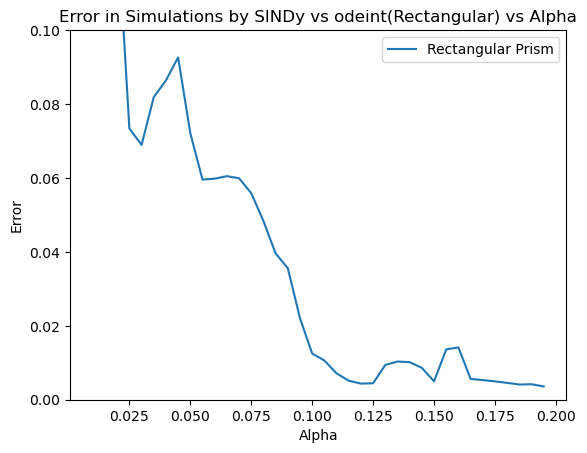

In [737]:
plt.plot(alpcub,erralpcub, label='Rectangular Prism')
plt.ylim([0,0.1])

plt.xlabel("Alpha")
plt.ylabel("Error")
plt.title("Error in Simulations by SINDy vs odeint(Rectangular) vs Alpha")

plt.legend()
plt.show()


In [735]:
errcubalp(0.1)

C:\Users\visma\anaconda3\lib\site-packages\pysindy\optimizers\sr3.py:390: ConvergenceWarning: SR3._reduce did not converge after 30 iterations.
  warnings.warn(
C:\Users\visma\anaconda3\lib\site-packages\pysindy\optimizers\sr3.py:390: ConvergenceWarning: SR3._reduce did not converge after 30 iterations.
  warnings.warn(
C:\Users\visma\anaconda3\lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


0.01250618488648293

# 2D

In [41]:
def rad(xyz):
    ptsnew = np.zeros([len(xyz),3])
    xy = xyz[:,0]**2 + xyz[:,1]**2
    ptsnew[:,0] = np.sqrt(xy + xyz[:,2]**2)
    ptsnew[:,1] = np.arctan2(np.sqrt(xy), xyz[:,2]) # for elevation angle defined from Z-axis down
    #ptsnew[:,4] = np.arctan2(xyz[:,2], np.sqrt(xy)) # for elevation angle defined from XY-plane up
    ptsnew[:,2] = np.arctan2(xyz[:,1], xyz[:,0])
    return ptsnew

In [42]:
m=[0,0.1,(0.99)**0.2] #inital magentisation
gamma=-1.760  #*10^11 for actual value
alpha=0.8
h=(0,0,-1)
p=(h,gamma,alpha)
t = np.arange(0.0, 5,0.01)
result_odeintz = odeint(func, m, t,p, tfirst=True)

In [43]:
rad1=rad(result_odeintz)

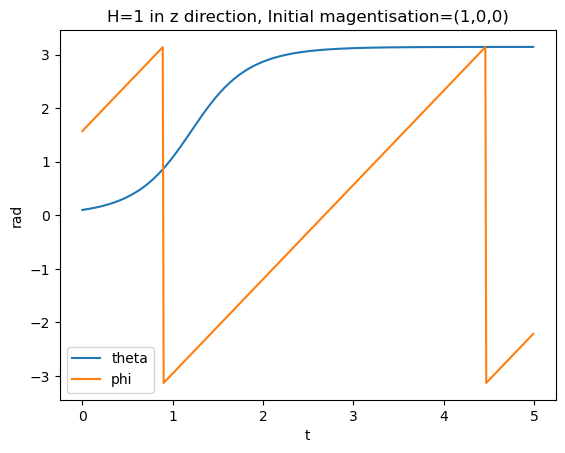

In [44]:
fig = plt.figure()
# plt.plot(t,rad1[:,0], label='r')
plt.plot(t,rad1[:,1], label='theta')
plt.plot(t,rad1[:,2], label='phi')

plt.xlabel("t")
plt.ylabel("rad")
plt.title("H=1 in z direction, Initial magentisation=(1,0,0)")
plt.legend()
plt.show()

Text(0.5, 0.92, 'Magnetisation for 0D single spin')

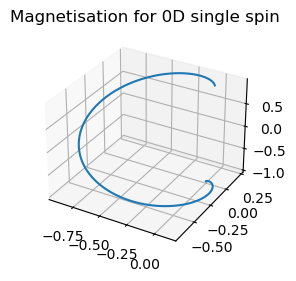

In [45]:
fig=plt.figure()
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot(result_odeintz[:, 0],
        result_odeintz[:, 1],
        result_odeintz[:, 2])
ax.set_title("Magnetisation for 0D single spin")

In [46]:
def dot(pol,t):
    udot=np.zeros(len(pol))
    for i in list(range(len(pol)-1)):
        k=np.array([pol[i+1]-pol[i]-2*np.pi,pol[i+1]-pol[i],pol[i+1]-pol[i]+2*np.pi])
        ind=np.where(np.abs(k)==(min(np.abs(k))))
        udot[i]=(k[ind]/(t[i+1]-t[i]))[0]
    k=np.array([pol[-1]-pol[-2]-2*np.pi,pol[-1]-pol[-2],pol[-1]-pol[-2]+2*np.pi])
    ind=np.where(np.abs(k)==(min(np.abs(k))))
    udot[-1]=(k[ind]/(t[-1]-t[-2]))[0]
    return udot
        
    

In [47]:
udot=np.stack((dot(rad1[:,1],t),dot(rad1[:,2],t)),axis=-1)
udot=np.array(udot)

In [48]:
udot[4,0]

0.2769678707425435

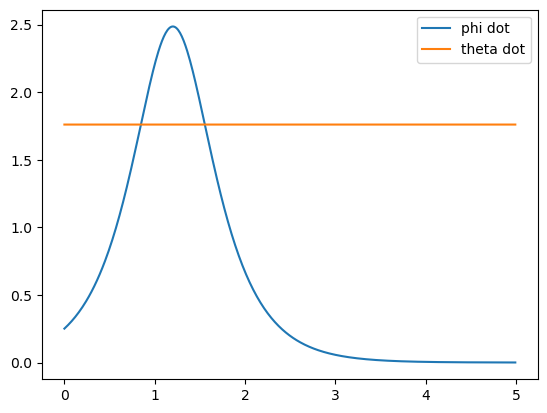

In [49]:

fig = plt.figure()
plt.plot(t,udot[:,0], label='phi dot')
plt.plot(t,udot[:,1], label='theta dot')
plt.legend()
plt.show()

In [50]:
library_functions = [lambda x: np.cos(x),lambda x: np.sin(x),lambda x: np.sin(x)*np.cos(x), lambda x: 1]
library_function_names = [lambda x: "cos(" + x +")", lambda x: "sin(" + x + ")",lambda x: "Sin("+ x +")*Cos("+x+")", lambda x: 1]
pde_lib = ps.PDELibrary(
    library_functions=library_functions,
    function_names=library_function_names,
    )
modelpol = ps.SINDy(feature_library=pde_lib,feature_names=["theta","phi"])
modelpol.fit(rad1[:,-2:],x_dot=udot)
modelpol.print()

(theta)' = 2.485 sin(theta)
(phi)' = 0.880 1 + 0.880 1


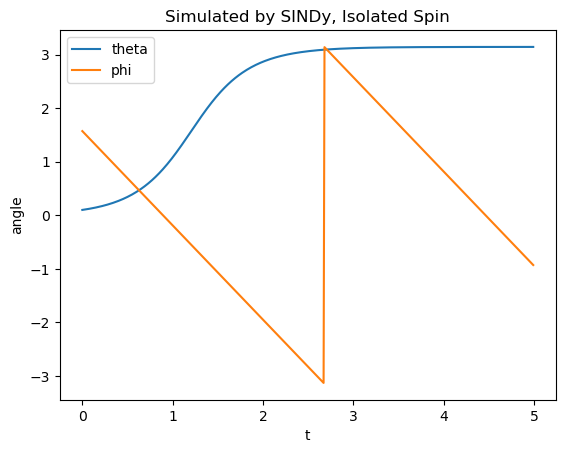

In [51]:
simpol=modelpol.simulate(rad1[0,-2:],t,integrator='odeint')
phi=simpol[:,1]
phi = ((phi%(2*np.pi))-np.pi)*-1
fig = plt.figure()

plt.plot(t,simpol[:,0], label='theta')
plt.plot(t,phi, label='phi')

plt.xlabel("t")
plt.ylabel("angle")
plt.title("Simulated by SINDy, Isolated Spin")
plt.legend()
plt.show()

In [52]:
np.acos2(-1)

AttributeError: module 'numpy' has no attribute 'acos2'

In [ ]:
def timet(lis,t,thr):
    r=len(lis)
    for i in range(r):
        if (lis[i]>=thr):
            return t[i]
    return(t[-1])

In [ ]:
print(timet(simpol[:,0],t,3.14))
print(timet(rad1[:,1],t,3.14))

In [ ]:
def ang(lis):
    n=0
    l=len(lis)
    temp=lis
    for i in range(l):
        if(lis[i]>=2*(n+1)*np.pi):
            temp[i]=lis[i]- 2*(n+1)*np.pi
            n=n+1
        else:
            temp[i]=lis[i]- 2*(n)*np.pi
    return(temp-np.pi)

In [ ]:
phi=simpol[:,1]
phi = (phi%(2*np.pi))-np.pi
print(phi)

In [ ]:
def timepr(alpha,thr):
    m=[0,0.1,(0.99)**0.2] #inital magentisation
    gamma=-1.760  #*10^11 for actual value
    
    h=(0,0,-1)
    p=(h,gamma,alpha)
    t = np.arange(0.0, 200,0.01)
    result_odeintz = odeint(func, m, t,p, tfirst=True)
    for i in range(20000):
        if (result_odeintz[i,2]<=thr):
            return t[i]
    return(201)

In [ ]:
from joblib import Parallel, delayed
al=np.arange(0.02,0.8,0.02)
timeal = Parallel(n_jobs=6)(delayed(timepr)(a,-1) for a in al)


In [ ]:
plt.plot(al,timeal, label='Isolated spin')
plt.xlabel("Alpha")
plt.ylabel("Time")
plt.title("Time to reach z=-1 vs Alpha")

plt.legend()
plt.show()


In [ ]:
len(timeal)

In [ ]:
np.array([-2,0,2])[np.where(np.abs([-2,0,2])==0)]

In [ ]:
def timeprsim(alph,thr):
    m=[0,0.1,(0.99)**0.2] #inital magentisation
    gamma=-1.760  #*10^11 for actual value
    h=(0,0,-1)
    p=(h,gamma,alph)
    t = np.arange(0.0, 200,0.01)
    result_odeintz = odeint(func, m, t,p, tfirst=True)
    rad1=rad(result_odeintz)
    udot=np.stack((dot(rad1[:,1],t),dot(rad1[:,2],t)),axis=-1)
    udot=np.array(udot)
    library_functions = [lambda x: np.cos(x),lambda x: np.sin(x),lambda x: np.sin(x)*np.cos(x), lambda x: 1]
    library_function_names = [lambda x: "cos(" + x +")", lambda x: "sin(" + x + ")",lambda x: "Sin("+ x +")*Cos("+x+")", lambda x: 1]
    pde_lib = ps.PDELibrary(
    library_functions=library_functions,
    function_names=library_function_names,
    )
    modelpol = ps.SINDy(feature_library=pde_lib,feature_names=["theta","phi"])
    modelpol.fit(rad1[:,-2:],x_dot=udot)
    simpol=modelpol.simulate(rad1[0,-2:],t,integrator='odeint')
    return timet(simpol[:,0],t,thr)

In [ ]:
from joblib import Parallel, delayed
al=np.arange(0.02,0.8,0.02)
timeal = Parallel(n_jobs=12)(delayed(timeprsim)(a,3.14) for a in al)

In [ ]:
plt.plot(al,timeal, label='Isolated spin')
plt.xlabel("Alpha")
plt.ylabel("Time")
plt.title("Time to reach z=-1 vs Alpha, Simulated by SINDy")

plt.legend()
plt.show()


In [ ]:
timeprsim(0.05,3.14)